In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import cv2
from google.colab.patches import cv2_imshow

In [7]:
# Location of parking spaces
file = open("/content/gdrive/MyDrive/Parking_lots/parkinglot.txt", "r")
parkinglot_boxes = file.read()

parkarr = parkinglot_boxes.split('\n')

try:
  parkarr.remove('')
except:
  print("'' is not exist")  

pinned_car_boxes = []

for box in parkarr:
  box = box.split(' ')
  pinned_car_boxes.append([box[0], box[1], box[2], box[3], box[4]])

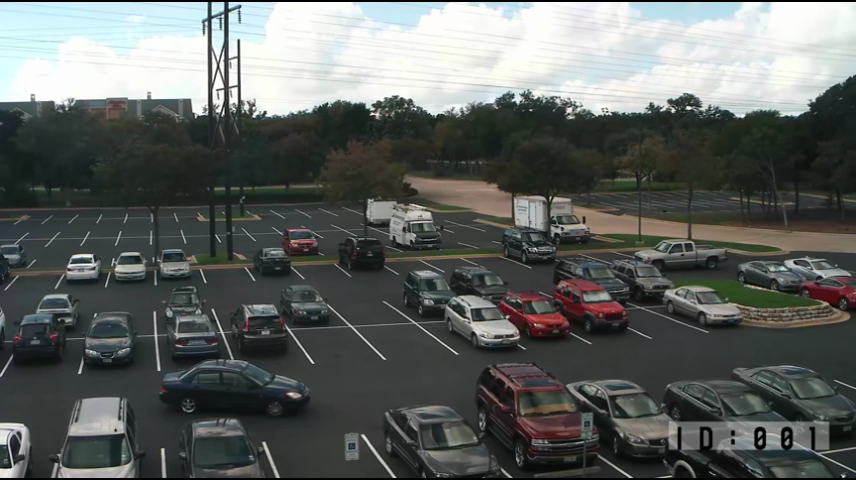

In [8]:
# 원본이미지를 읽어 옵니다. 
img = cv2.imread("/content/gdrive/MyDrive/Parking_lots/parkinglot.png")
height, width = img.shape[:2]

# 원본이미지를 Display 
cv2_imshow(img)

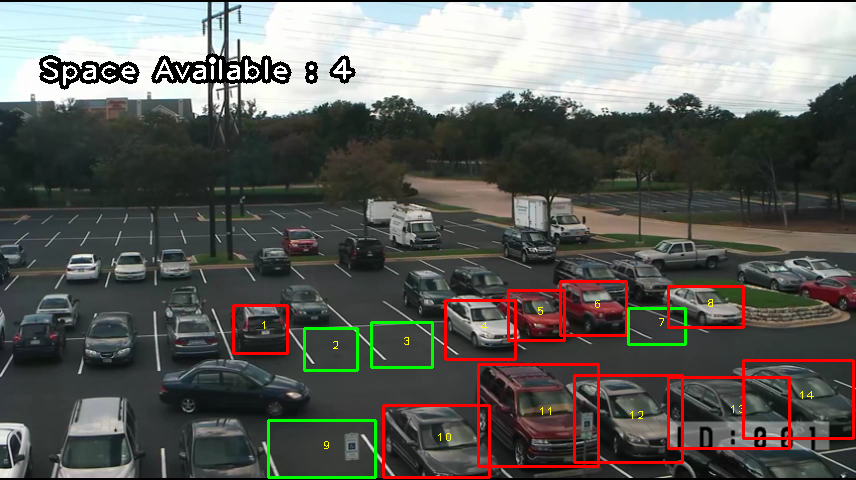

In [9]:
font = cv2.FONT_HERSHEY_PLAIN
s_available = 0

for i, pin_boxes in enumerate(pinned_car_boxes):           
    center_x = int(float(pin_boxes[1]) * width)
    center_y = int(float(pin_boxes[2]) * height)
    w = int(float(pin_boxes[3]) * width)
    h = int(float(pin_boxes[4]) * height)

    # Rectangle coordinates
    x = int(center_x - w / 2)
    y = int(center_y - h / 2)

    if pin_boxes[0] == '0':  # 주차되어 있는 경우
       cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
       cv2.putText(img, str(i+1), (center_x, center_y), font, 0.8, (0, 255, 255), 1)
    else:   # 주차되어 있지 않은 경우           
       cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
       cv2.putText(img, str(i+1), (center_x, center_y), font, 0.8, (0, 255, 255), 1)
       s_available += 1
    
cv2.putText(img, 'Space Available : '+ str(s_available), (40, 80), font, 2, (0, 0, 0), 10)   
cv2.putText(img, 'Space Available : '+ str(s_available), (40, 80), font, 2, (255, 255, 255), 2)

cv2_imshow(img)    